# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# Set google colab as the directory from which to upload my dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data from my google drive
df = pd.read_csv('/content/drive/MyDrive/MIT Data Science/exercise_python/foodhub_order.csv')

# return the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Check the number of rows and columns of the dataset
print('The number of rows in the dataset is', df.shape[0])
print('The number of columns in the dataset is', df.shape[1])

The number of rows in the dataset is 1898
The number of columns in the dataset is 9


#### Observations:

*  The dataset has 1898 rows and 9 columns




### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Check the datatype of each variable or column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

* The dataset has three different datatype: integer, float, and object(categorical variable).
* The variables: Cost of the Order, food_preparation_time, and delivery_time are numerical variables.
* Variables: order_id and customer_id should be categorical variables but are classified as numerical variables, specifically integers in this dataset.
* Restaurant_name, cuisine_type, day_of_the_week, and rating are categorical variables.



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Check for missing values in the dataset
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:

*   There are no missing values in the dataset



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Generate the statistical summary for all variables or columns
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:


*  The minimum food preparation time is 23 minutes
*  The average food preparation time is 27 minutes
*  The maximum food preparation time is 31 minutes






### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# Check the number of orders with no rating (or rating not given)
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:

*   736 orders are not rated (not given)




### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

# **Order ID**

In [9]:
# Check the number of unique order IDs in the dataset
df.order_id.nunique()

1898

There are 1898 unique order IDs, which match the number of rows in the dataset.

# **Customer ID**

In [10]:
# Check the number of unique customer IDs in the dataset
df.customer_id.nunique()

1200

There are 1200 unique customer IDs

# **Restaurant name**

In [11]:
# Check the number of different restaurant names in the dataset
df.restaurant_name.nunique()

178

There are also 178 different restaurant names in the dataset

# **Cuisine Type**

In [12]:
# Check the number of different cuisine types in the dataset
df.cuisine_type.nunique()

14

In the dataset, there are 14 different cuisines.

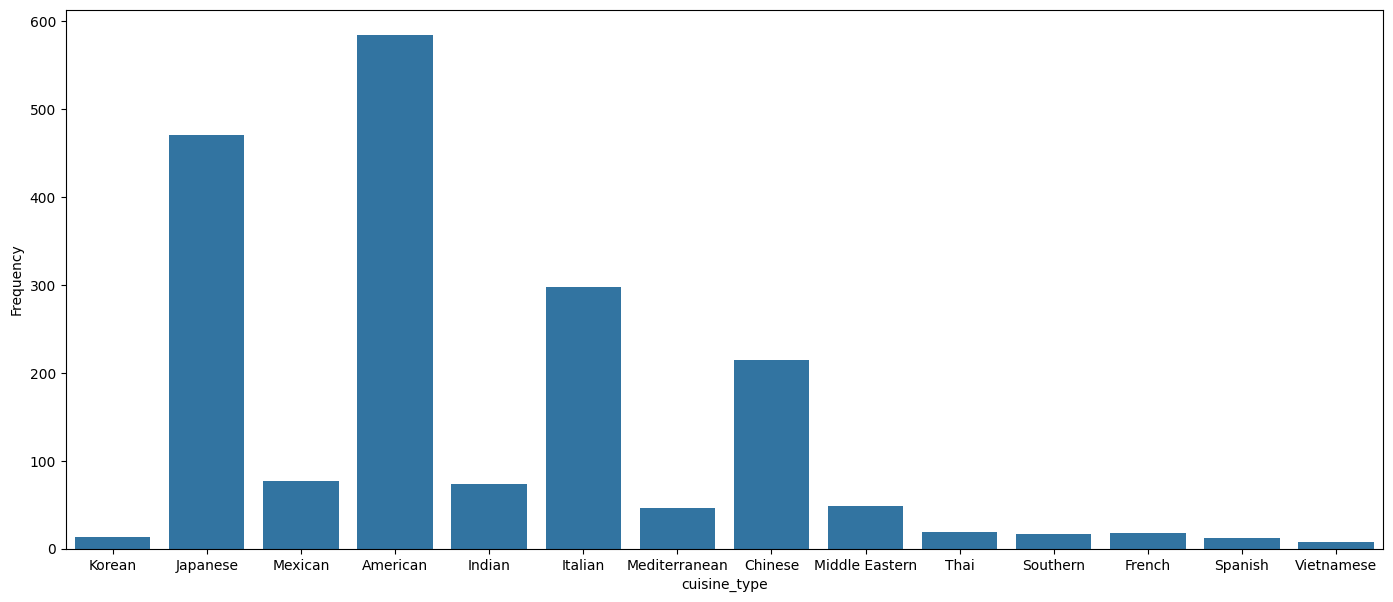

In [13]:
# Generate a barplot to check the frequencies of each cuisine type. This variable has only 14 different values. A bar plot is most suitable for plotting categorical data.
plt.figure(figsize=(17, 7))
sns.countplot(data=df, x='cuisine_type')
plt.ylabel('Frequency');

Among cuisine types, American appears to have the largest frequency, followed by Japanese, Italian, and Chinese. Vietnamese has the lowest frequency.

# **Cost of the Order**

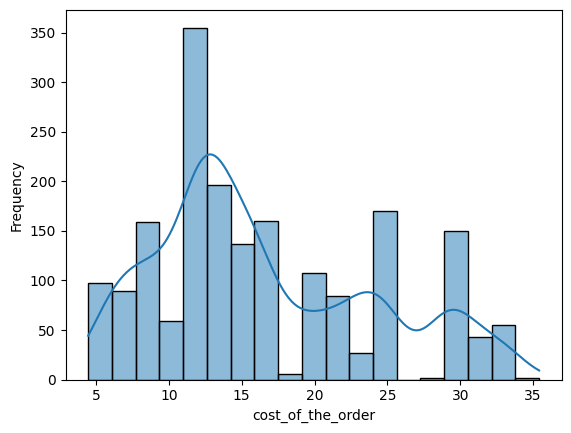

In [55]:
#Generate a histogram plot for the variable "cost of order" to check its distribution. This variable consists of numeric continuous data values and can be best represented graphically using a histogram
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.ylabel('Frequency');

The distribution of 'cost of the order' is right-skewed.

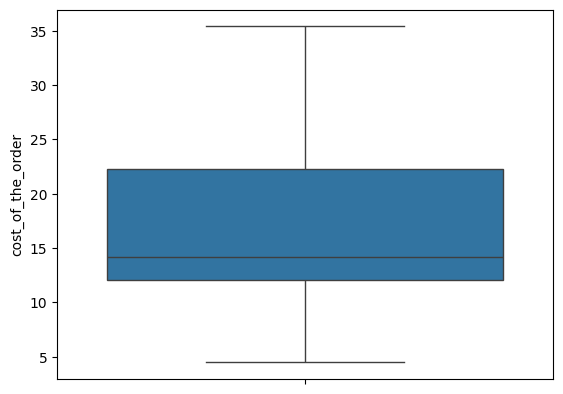

In [16]:
# Generate a histogram plot for the variable: cost of the order to check for the distribution and detect any outliers
sns.boxplot(data=df, y='cost_of_the_order');

This boxplot confirms that the variable is right skewed.

Also, this variable has no outliers.



# **Day of the Week**

In [17]:
# Check the number of unique values for the variable: day of the week
df.day_of_the_week.unique()

array(['Weekend', 'Weekday'], dtype=object)

There are only two unique values for the variable: day of the week. These values are weekend and weekday

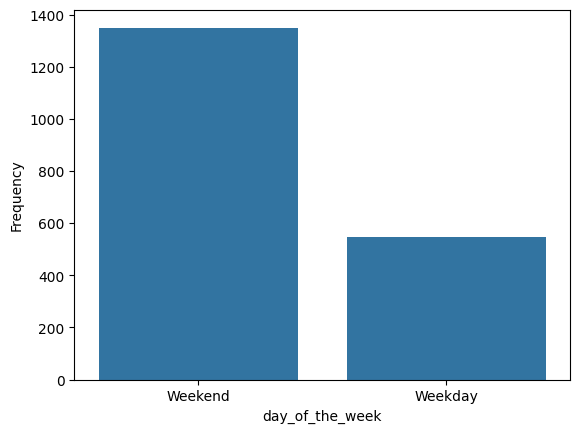

In [18]:
# Generate a barplot to show the frequencies of each unique value in the day of the week variable. A bar plot is most suitable for plotting categorical data.
sns.countplot(x = df.day_of_the_week)
plt.ylabel('Frequency')
plt.show();

Most orders were made on Weekends than Weekdays

# **Rating**

In [19]:
#Check the number of unique values for the variable: Rating
df.rating.unique()

array(['Not given', '5', '3', '4'], dtype=object)

Rating has four values: Not given (or not rated), 5, 4, and 3.

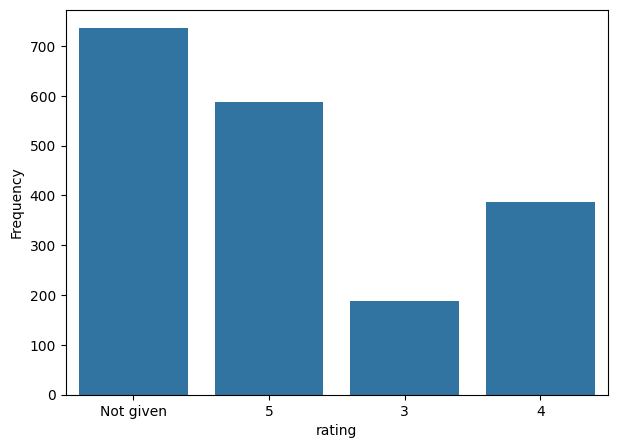

In [20]:
# Generate a barplot to show the frequencies each unique value in the rating variable. A bar plot is most suitable for plotting categorical data.
plt.figure(figsize=(7, 5))
sns.countplot(x = df.rating)
plt.ylabel('Frequency')
plt.show();

# **Food Preparation Time**

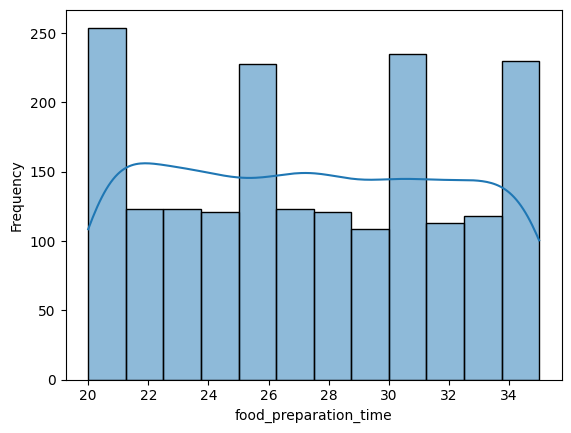

In [54]:
# Generate a histogram plot for the variable "cost of order" to check its distribution. This variable consists of numeric continuous data values and can be best represented graphically using a histogram
sns.histplot(df.food_preparation_time, kde = True)
plt.ylabel('Frequency');

Food preparation time seems to follow a uniform distributions.



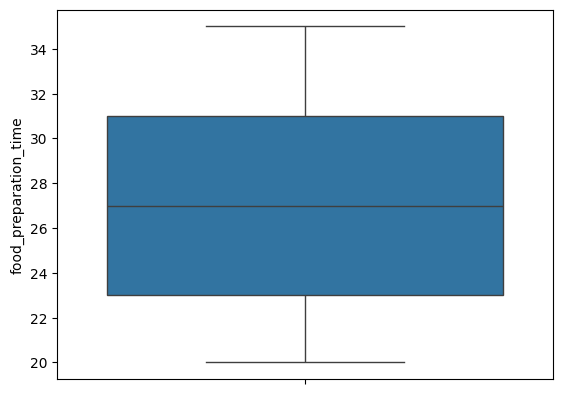

In [22]:
# Generate a boxplot for the variable'cost of the order' to verify the distribution and identify potential outliers
sns.boxplot(df.food_preparation_time);

This variable has no outlier.

# **Delivery Time**

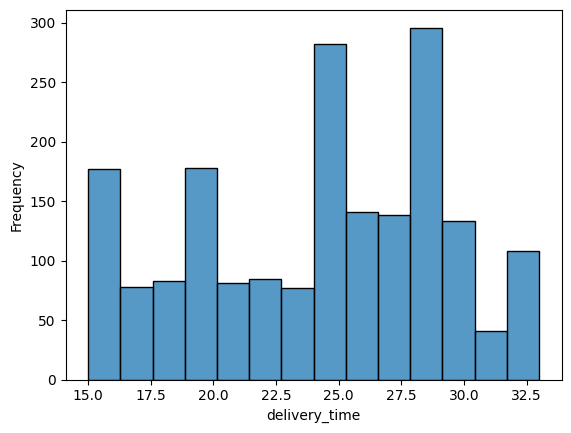

In [57]:
#Generate a histogram plot for the variable "cost of order" to check its distribution. This variable consists of numeric continuous data values and can be best represented graphically using a histogram
sns.histplot(df.delivery_time)
plt.ylabel('Frequency');

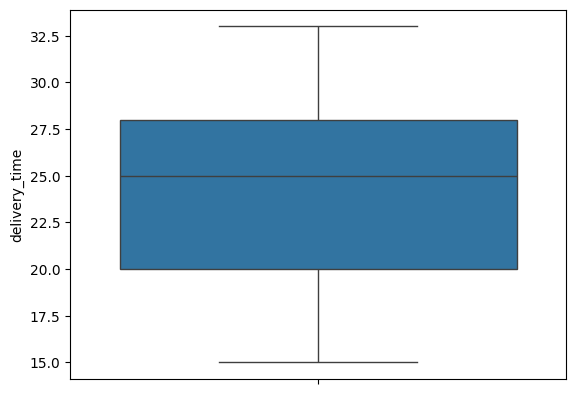

In [24]:
# Generate a histogram plot for the variable 'delivery time' to check for its distribution and detect outliers
sns.boxplot(df.delivery_time);

Delivery time has no outlier.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [25]:
#Finding the top 5 restaurants
df.restaurant_name.value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


Shake Shack has the highest number of orders followed by The Meatball Shop and Blue Ribbon Sushi. The others were Blue Ribbon Fried Chicken and Parm.

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [26]:
# Extract all rows in the dataset with the day of the week indicated as weekend
df_weekend = df[df['day_of_the_week'] == 'Weekend']

#Perform a value count for each cuisine type
df_weekend.cuisine_type.value_counts()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Middle Eastern,32
Mediterranean,32
Thai,15


#### Observations:

*   The most popular cuisine on weekends is American cuisine.



### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [27]:
# Extracts the orders that cost more than 20 dollars from the dataset
df_greater_than_20 = df[df['cost_of_the_order']>20]

# Count the total number of orders in the df_greater_than_20 sub-data
df_greater_than_20.cost_of_the_order.shape[0]

555

In [28]:
# Compute the percentage of such orders in the entire dataset, i.e., df dataset
percentage = (555 / 1898) * 100

# round the percentage to two decimal places
print ('Percentage of orders above 20 dollars is', round(percentage,2), '%')

Percentage of orders above 20 dollars is 29.24 %


#### Observations:

*   29.2% of the orders cost more than 20 dollars




### **Question 10**: What is the mean order delivery time? [1 mark]

In [29]:
# Calculate the mean of order delivery time
mean_delivery_time = df.delivery_time.mean()

# print the result in two decimal places
print('The mean order delivery time is', round(mean_delivery_time,2), 'minutes')

The mean order delivery time is 24.16 minutes


#### Observations:

*   The mean order delivery time is 24.16 minutes




### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [30]:
# Find the value counts for each distinct customer ID
df.customer_id.value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:

*   The top three customers eligible for the 20% discount vouchers are 52832, 47440, and 83287.




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


# **Explore relationship between Cuisine Type and Cost of the Order**

*   Cuisine Type is a categorical variable, while Cost of the Order is a numerical variable. A boxplot is suitable for graphically presenting their relationship.





/tmp/ipython-input-2432530352.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df.cuisine_type, y = df.cost_of_the_order, palette = 'RdBu')


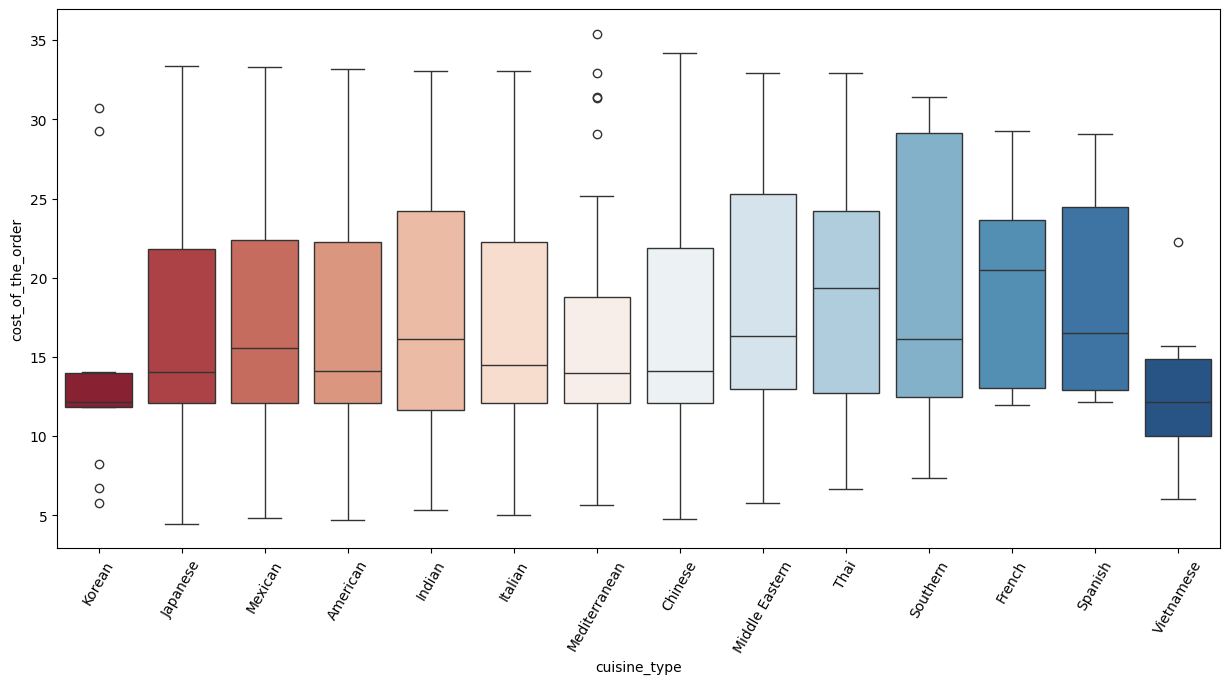

In [51]:
# Explore the relationship between these two variables using the boxplots, with the cuisine type on the x-axis and the cost of the order on the y-axis
plt.figure(figsize=(15,7))
sns.boxplot(x = df.cuisine_type, y = df.cost_of_the_order, palette = 'RdBu')
plt.xticks(rotation = 60)
plt.show();

French and Thai cuisines have higher median order costs, indicating they are among the more expensive cuisines.

Korean and Vietnamese cuisines show lower median costs, suggesting they are generally more affordable.

Korean, Mediterranean, and Vietnamese cuisines display notable outliers, indicating occasional orders with significantly different pricing.

Mediterranean cuisine has the highest recorded order cost, reaching approximately $35.






# **Explore relationship between Food Preparation Time and Cuisine Type**

*  Cuisine Type is a categorical variable, while Food Preparation Time is a numerical variable. A boxplot is suitable for graphically presenting their relationship.

/tmp/ipython-input-2000573353.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df.cuisine_type, y = df.food_preparation_time, palette = 'PiYG')


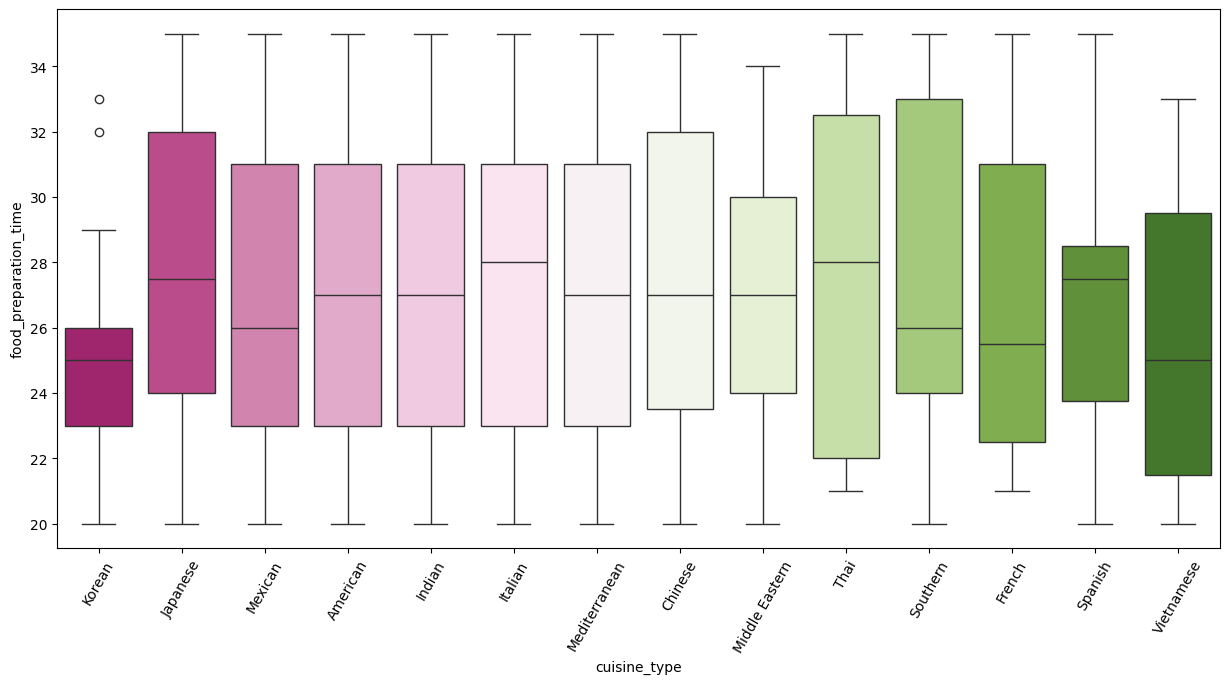

In [50]:
# Explore the relationship between these two variables using the boxplot, with the cuisine type on the x-axis and the food preparatation time on the y-axis
plt.figure(figsize=(15,7))
sns.boxplot(x = df.cuisine_type, y = df.food_preparation_time, palette = 'PiYG')
plt.xticks(rotation = 60)
plt.show();

Italian and Thai cuisines have higher median food preparation times, indicating they generally take longer to prepare.

Vietnamese, Korean, and French cuisines show lower median preparation times, suggesting they are typically faster to prepare.

Korean cuisine shows outliers, indicating that occasional orders that take significantly longer than usual to prepare.

# **Explore the relationship between Day of the Week and Delivery Time**

*   Day of the Week is a categorical variable, while Delivery Time is a numerical variable. A boxplot is suitable for graphically presenting their relationship.



/tmp/ipython-input-1361689920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df.day_of_the_week, y = df.delivery_time, palette = 'colorblind')


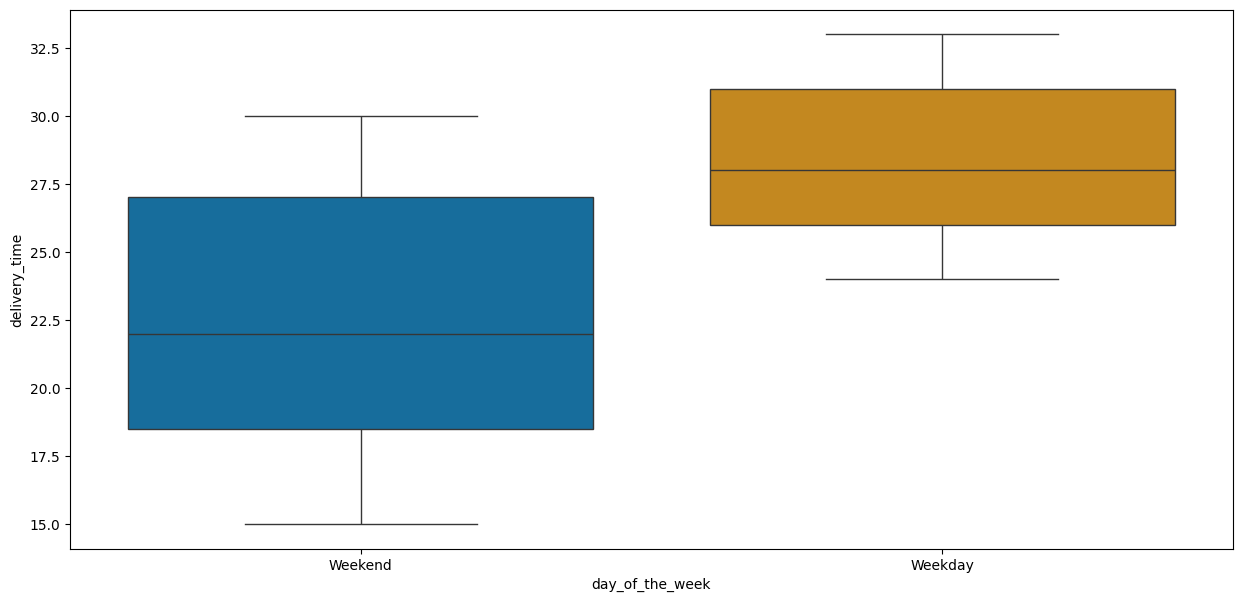

In [33]:
# Explore the relationship between these two variables using the boxplot, with the Day of the Week on the x-axis and Delivery Time on the y-axis
plt.figure(figsize=(15,7))
sns.boxplot(x = df.day_of_the_week, y = df.delivery_time, palette = 'colorblind')
plt.show();

*   Delivery times are  longer on weekdays compared to weekends.  
*   The median delivery time during the week is approximately 28 minutes, whereas on weekends, it is around 22 minutes, indicating that deliveries tend to be slower on weekdays.







# **Explore the relationship between restaurants and cost of the order**

There is the restaurant name variable, which is categorical, and the cost of the order, which is a numerical variable. While this relationship could typically be visualized using a boxplot, the challenge arises from the large number of unique values for the 'restaurant name' variable, which has 170 different values. Therefore, in this case, a cross-tabulation will be more appropriate.

In [34]:
# Explore relationship using the groupby function
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


In [35]:
# Explore the relationship using the crosstab function
pd.crosstab(index = df.restaurant_name, columns = 'Total Cost', values = df.cost_of_the_order, aggfunc = 'sum').sort_values(by='Total Cost', ascending=False).head(14)

col_0,Total Cost
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


Explore the relationship between Rating and Delivery Time

*   Rating is a categorical variable, while Delivery Time is a numerical variable. A boxplot is suitable for graphically presenting their relationship.



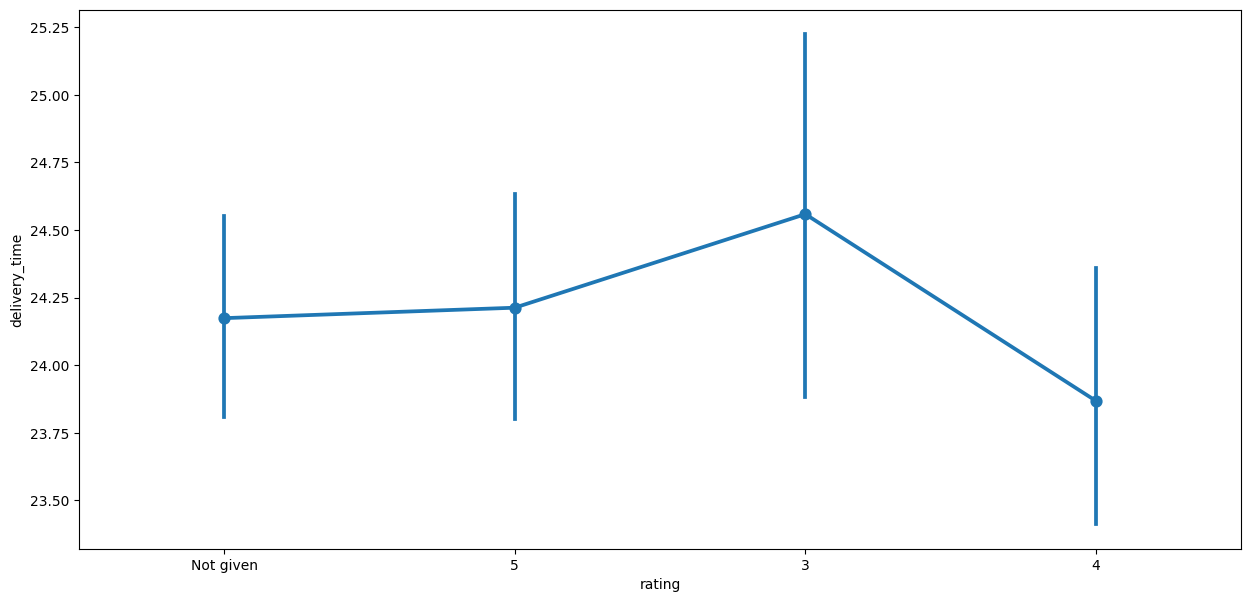

In [36]:
# Explore the relationship using the pointplot function
plt.figure(figsize=(15, 7))
sns.pointplot(x = df.rating, y = df.delivery_time)
plt.show();

*   Delivery time tend to affect the orders ratings



# **Explore the relationship between Rating and Food Preparation Time**

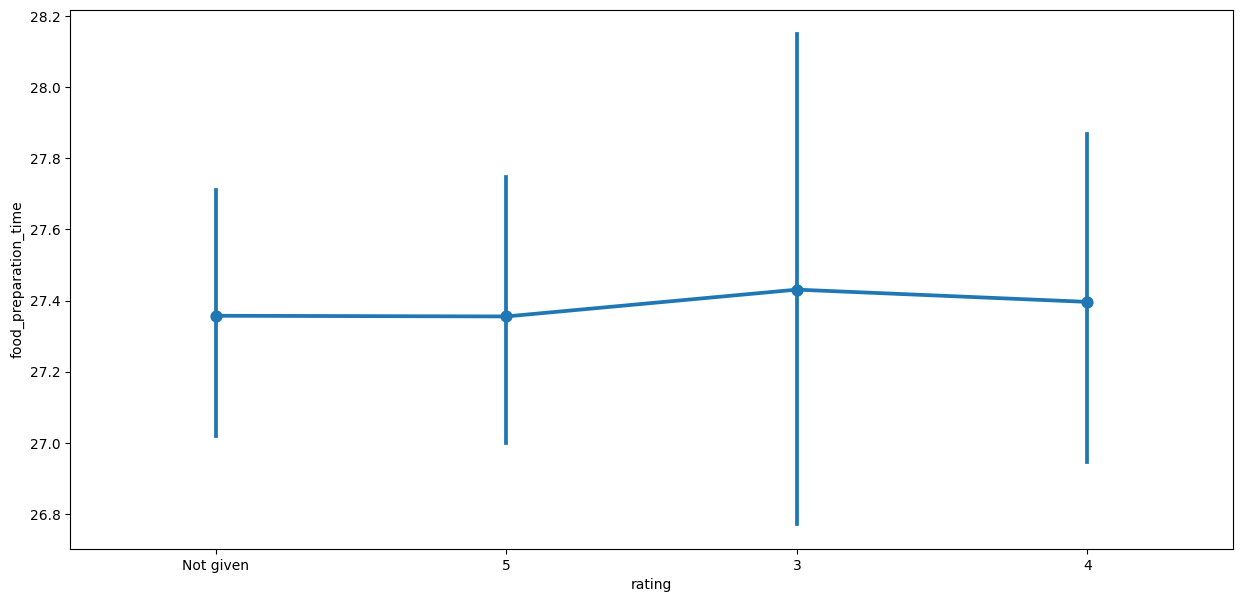

In [37]:
# Explore the relationship using the pointplot function
plt.figure(figsize=(15, 7))
sns.pointplot(x = df.rating, y = df.food_preparation_time)
plt.show();

*   The food preparation time does not appear to affect the ratings of orders.





# **Explore relationship between Rating and Cost of the Order**

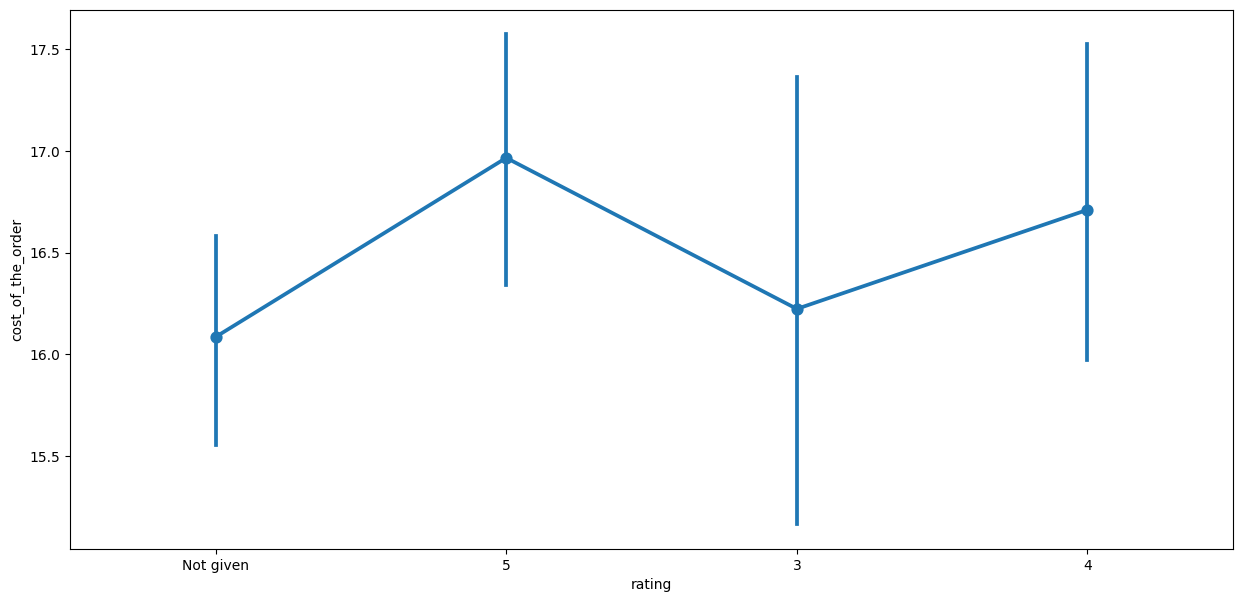

In [38]:
# Explore the relationship using the pointplot function
plt.figure(figsize=(15, 7))
sns.pointplot(x = df.rating, y = df.cost_of_the_order)
plt.show();

*   The cost of an order tends to impact its ratings.




# **Relationship between numerical variables only: cost of the order, food preparation time and delivery time**

In [39]:
# Select relevant columns and compute correlation
corr_matrix = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()
corr_matrix

,cost_of_the_order,food_preparation_time,delivery_time
cost_of_the_order,1.000000,0.041527,-0.029949
food_preparation_time,0.041527,1.000000,0.011094
delivery_time,-0.029949,0.011094,1.000000


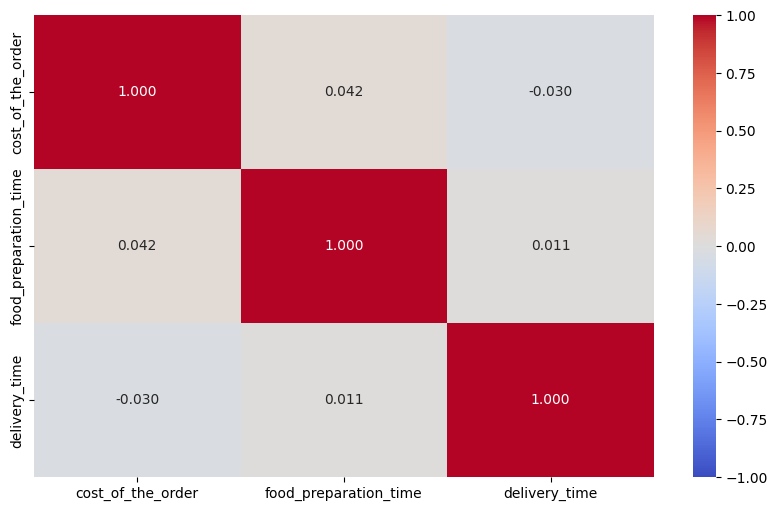

In [40]:
# Plot the correlation matrix on a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm', fmt=".3f")
plt.show();

*   Cost of order and food preparation time are positively correlated, indicating that higher costs of orders may take slightly longer to prepare
* The cost of the order and the delivery time are negatively correlated, suggesting that more expensive orders may get delivered slightly faster.
*   Food preparation time and delivery time are positively correlated, indicating how long the food takes to prepare does not meaningfully impact how long it takes to deliver





### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [41]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()
df_rated

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [42]:
# Change rating value, which is object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

In [43]:
# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [44]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50] ['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() # Complete the code to find the mean rating

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:

*   The Meatball Shop has the highest average rating, which is 4.511.






### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [45]:
# Define a function to calculate revenue per order and using the conditional if, elif function
def compute_revenue(order_cost):
    if order_cost > 20:
        return order_cost*0.25
    elif order_cost > 5:
        return order_cost*0.15
    else:
        return order_cost*0

#Apply the function to calculate revenue for each order in the dataset. A new column 'Revenue" is created to have the new values generated from the application of the function
df['Revenue'] = df['cost_of_the_order'].apply(compute_revenue).round(2)

#Display first five rows of the dataset with Revenue included as a new column
df.sort_values(by='Revenue', ascending=False)[['order_id','restaurant_name','cost_of_the_order', 'Revenue']]

,order_id,restaurant_name,cost_of_the_order,Revenue
573,1477814,Pylos,35.41,8.85
1646,1477665,Han Dynasty,34.19,8.55
1762,1477700,Blue Ribbon Sushi,33.37,8.34
1831,1476970,Nobu Next Door,33.37,8.34
1370,1478329,Tres Carnes,33.32,8.33
...,...,...,...,...
1695,1478302,Blue Ribbon Sushi Bar & Grill,4.90,0.00
1569,1477786,RedFarm Hudson,4.75,0.00
542,1477788,P.J. Clarke's,4.71,0.00
82,1477790,Shake Shack,4.75,0.00


In [46]:
# Get the total revenue and print it
total_rev = df['Revenue'].sum() # Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.4 dollars


#### Observations:

*   The order with the highest revenue has an order ID of 1477814 and a net revenue of 8.85 dollars.
*   Several orders has a net revenue of $0.
*   The total sum of net revenue is 6,166.40 dollars.





### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [47]:
# Calculate total delivery time (prep + delivery) and create a new column called total_time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Find the number of orders with total_time > 60
orders_over_60 = df[df['total_time'] > 60].shape[0]

# Calculate total number of orders, which is 1898
total_orders = df.shape[0]

print('The orders with total time is', orders_over_60)
print('The number of total orders in the dataset is', total_orders)


The orders with total time is 200
The number of total orders in the dataset is 1898


In [48]:
#Compute the percentage
percentage_over_60 = (200/ 1898) * 100

#Print result
print(f"The percentage of orders taking more than 60 minutes is {round(percentage_over_60, 2)}%")

The percentage of orders taking more than 60 minutes is 10.54%


#### Observations:
*   Orders with a total time of over 60 minutes are 200.
*  10.54% of the orders have a total time (comprising preparation and delivery times) of over 60 minutes.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [49]:
# Find the mean delivery time on weekdays
delivery_time_weekday = round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean())
print('The mean delivery time on weekdays is around', delivery_time_weekday, 'minutes')


# Find the mean delivery time on weekends
delivery_time_weekend = round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean())
print('The mean delivery time on weekends is around', delivery_time_weekend, 'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations:

*   The mean delivery time is about six minutes longer on weekends than on weekdays.
*   On weekends, the mean delivery time is about 28 minutes.
*   On weekdays, the mean delivery time is around 22 minutes.



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

1.   The  food preparation time is between 23 and 31 minutes with an overall average food preparation time of 27 minutes.
2.   The average delivery time for the orders is about 24 minutes. The mean delivery time is about six minutes longer on weekends than on weekdays. On weekends, the mean delivery time is approximately 28 minutes, while on weekdays it is around 22 minutes.
3.   Delivery times are  longer on weekdays compared to weekends.
4.   The time taken to prepare food does not appear to affect the ratings of orders.
5.   The cost of an order tends to impact its ratings. Higher cost of order tends to receive a higher rating
6.   Orders that received higher ratings have shorter delivery times.
7.   10.54% of the orders have a total time (comprising preparation and delivery times) of over 60 minutes.
8.   The net revenue is around 6166.4 dollars
9. Italian and Thai cuisines have higher median food preparation times, indicating they generally take longer to prepare. Vietnamese, Korean, and French cuisines show lower median preparation times, suggesting they are typically faster to prepare.













### Recommendations:

*  Delivery personnel should aim to reduce delivery times on weekends to match the levels typically seen on weekdays. This may involve choosing the shortest routes to the customer locations for order delivery.  
*  Reducing delivery time could positively impact the business's ratings, as evidence suggests that orders with shorter delivery times tend to receive higher ratings.
*  Foodhub should consider expanding its delivery options to include more of the Vietnamese, Korean, and French cuisines, which generally have shorter preparation times.
*  It is important to collect data on various routes used by the delivery personnel to better understand the differences in delivery times between weekends and weekdays.
*   It is advisable to build a machine learning model that could help accurately predict delivery times and ratings for orders.





---